<a href="https://colab.research.google.com/github/Gobihanath/Tensorflow-Basics/blob/main/Tensorflow1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tensorflow Basics

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
print(tf.version)


Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
<module 'tensorflow._api.v2.version' from '/usr/local/lib/python3.11/dist-packages/tensorflow/_api/v2/version/__init__.py'>


Defining Tensors

In [ ]:
string = tf.Variable("this is a string", tf.string)
number = tf.Variable(324, tf.int16)
floating = tf.Variable(3.567, tf.float64)

Rank/Degree of Tensors (Number of dimensions in the tensor)

In [ ]:
rank1_tensor = tf.Variable(["Test"], tf.string)
rank2_tensor = tf.Variable([["test", "ok"], ["test", "yes"]], tf.string)

tf.rank(rank1_tensor)

<tf.Tensor: shape=(), dtype=int32, numpy=1>

Shape of Tensors

In [ ]:
shape2 = rank2_tensor.shape
print(shape2)
shape1 = rank1_tensor.shape
print(shape1)

(2, 2)
(1,)


Changing the shape

In [ ]:
tensor1 = tf.zeros([6,6])
print(tensor1)
print("After reshaping")
t = tf.reshape(tensor1,[36])
print(t)

tf.Tensor(
[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]], shape=(6, 6), dtype=float32)
After reshaping
tf.Tensor(
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.], shape=(36,), dtype=float32)


# **Tensorflow Core Learning Algorithms**

## The main algorithms are


1.   Linear Regression
2.   Classification
3.   Clustering
4.   Hidden Markov Models

# Linear Regression
Linear regression is one of the most basic forms of machine learning and is used to predict numeric values.

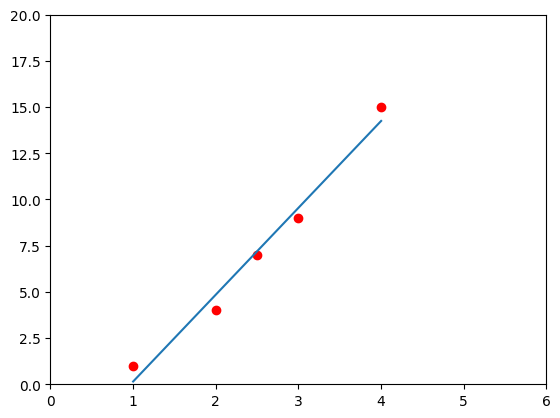

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = [1, 2, 2.5, 3, 4]
y = [1, 4, 7, 9, 15]
plt.plot(x, y, 'ro')
plt.axis([0, 6, 0, 20])
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
plt.show()

**Training VS Testing Data**

In [ ]:
import pandas as pd


# Load dataset.
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv') # training data
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv') # testing data
# print(dftrain.head())
y_train = dftrain.pop('survived')
y_eval = dfeval.pop('survived')
print(dftrain.head())
print(dftrain.describe())
print(dftrain.loc[0],dftrain.loc[2])
# Check the columns and first few rows of the dataset
print(dftrain.columns)
print(dftrain.head())




      sex   age  n_siblings_spouses  parch     fare  class     deck  \
0    male  22.0                   1      0   7.2500  Third  unknown   
1  female  38.0                   1      0  71.2833  First        C   
2  female  26.0                   0      0   7.9250  Third  unknown   
3  female  35.0                   1      0  53.1000  First        C   
4    male  28.0                   0      0   8.4583  Third  unknown   

   embark_town alone  
0  Southampton     n  
1    Cherbourg     n  
2  Southampton     y  
3  Southampton     n  
4   Queenstown     y  
              age  n_siblings_spouses       parch        fare
count  627.000000          627.000000  627.000000  627.000000
mean    29.631308            0.545455    0.379585   34.385399
std     12.511818            1.151090    0.792999   54.597730
min      0.750000            0.000000    0.000000    0.000000
25%     23.000000            0.000000    0.000000    7.895800
50%     28.000000            0.000000    0.000000   15.045800
7

Training vs Testing Data
You may have noticed that we loaded two different datasets above. This is because when we train models, we need two sets of data: training and testing.

The training data is what we feed to the model so that it can develop and learn. It is usually a much larger size than the testing data.

The testing data is what we use to evaulate the model and see how well it is performing. We must use a seperate set of data that the model has not been trained on to evaluate it. Can you think of why this is?

Well, the point of our model is to be able to make predictions on NEW data, data that we have never seen before. If we simply test the model on the data that it has already seen we cannot measure its accuracy accuratly. We can't be sure that the model hasn't simply memorized our training data. This is why we need our testing and training data to be seperate.

In [ ]:
import tensorflow as tf
import numpy as np

CATEGORICAL_COLUMNS = ['sex', 'n_siblings_spouses', 'parch', 'class', 'deck',
                       'embark_town', 'alone']
NUMERIC_COLUMNS = ['age', 'fare']

# Dictionary to store preprocessing layers
preprocessing_layers = {}

# Categorical feature processing using StringLookup / IntegerLookup
for feature_name in CATEGORICAL_COLUMNS:
    vocabulary = dftrain[feature_name].astype(str).unique().tolist()  # Convert to string & get unique values
    lookup_layer = tf.keras.layers.StringLookup(vocabulary=vocabulary, output_mode="one_hot")
    preprocessing_layers[feature_name] = lookup_layer

# Numeric feature processing using Normalization
for feature_name in NUMERIC_COLUMNS:
    normalizer = tf.keras.layers.Normalization()
    normalizer.adapt(np.array(dftrain[feature_name]).reshape(-1, 1))  # Normalize based on data
    preprocessing_layers[feature_name] = normalizer

# Print preprocessing layers
print(preprocessing_layers)


{'sex': <StringLookup name=string_lookup, built=False>, 'n_siblings_spouses': <StringLookup name=string_lookup_1, built=False>, 'parch': <StringLookup name=string_lookup_2, built=False>, 'class': <StringLookup name=string_lookup_3, built=False>, 'deck': <StringLookup name=string_lookup_4, built=False>, 'embark_town': <StringLookup name=string_lookup_5, built=False>, 'alone': <StringLookup name=string_lookup_6, built=False>, 'age': <Normalization name=normalization, built=True>, 'fare': <Normalization name=normalization_1, built=True>}


In [ ]:
dftrain["sex"].unique()

array(['male', 'female'], dtype=object)

###Input Function
The TensorFlow model we are going to use requires that the data we pass it comes in as a ```tf.data.Dataset``` object. This means we must create a *input function* that can convert our current pandas dataframe into that object.

Below you'll see a seemingly complicated input function, this is straight from the TensorFlow documentation (https://www.tensorflow.org/tutorials/estimator/linear). I've commented as much as I can to make it understandble, but you may want to refer to the documentation for a detailed explination of each method.

In [ ]:
# !pip install tensorflow==2.15.0 tensorflow-estimator==2.15.0


import tensorflow as tf
print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.15.0


In [ ]:
import tensorflow as tf
import pandas as pd
!pip install
import tensorflow_estimator as tf_estimator
from IPython.display import clear_output  # Import for clearing console output

# Load dataset
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv')  # training data
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv')  # testing data

# Preprocess the data (as in the previous response)
def preprocess(df):
    df = df.copy()  # Avoid modifying the original dataframe
    df['age'] = df['age'].fillna(df['age'].median())  # Fill missing values for 'age' with the median
    df['sex'] = df['sex'].map({'male': 0, 'female': 1})  # Map 'male' -> 0, 'female' -> 1
    df = pd.get_dummies(df, columns=['embark_town', 'class', 'deck'], drop_first=True)  # One-hot encoding
    df['alone'] = df['alone'].map({True: 1, False: 0})  # Map 'alone' to 0/1
    df = df.drop(['name', 'ticket', 'cabin'], axis=1, errors='ignore')  # Drop non-numeric columns
    df = df.apply(pd.to_numeric, errors='coerce')  # Ensure all data is numeric
    df = df.fillna(0)  # Fill missing values with 0 (optional)
    return df

dftrain = preprocess(dftrain)
dfeval = preprocess(dfeval)

# Separate features and labels
y_train = dftrain.pop('survived')
y_eval = dfeval.pop('survived')

# Function to create input function for TensorFlow dataset
def make_input_fn(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32):
    def input_function():
        ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))  # Convert to TensorFlow dataset
        if shuffle:
            ds = ds.shuffle(buffer_size=len(data_df))  # Shuffle dataset
        ds = ds.batch(batch_size).repeat(num_epochs)  # Batch and repeat dataset for epochs
        ds = ds.prefetch(tf.data.experimental.AUTOTUNE)  # Prefetch for optimization
        return ds
    return input_function

# Create input functions for training and evaluation
train_input_fn = make_input_fn(dftrain, y_train)  # Training dataset
eval_input_fn = make_input_fn(dfeval, y_eval, num_epochs=1, shuffle=False)  # Evaluation dataset

# Define feature columns for TensorFlow Estimator
feature_columns = []
for column in dftrain.columns:
    feature_columns.append(tf.feature_column.numeric_column(key=column))

# Initialize the Linear Classifier Estimator
linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns)

# Train the model
linear_est.train(input_fn=train_input_fn)

# Evaluate the model
result = linear_est.evaluate(input_fn=eval_input_fn)

# Clear console output
clear_output()

# Print model accuracy
print(f"Model Accuracy: {result['accuracy']:.4f}")  # Format accuracy for better readability



ERROR: You must give at least one requirement to install (see "pip help install")


ModuleNotFoundError: No module named 'tensorflow_estimator'